In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"d:\Загрузки\part1.csv")
df = df.sort_values(by='collection_day')
df['collection_day'] = pd.to_datetime(df['collection_day'])
df['starts_at'] = pd.to_datetime(df['starts_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])

d:\jupyter\venv\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (1,4,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
1139450,1139450,ОСНОВНЫЕ ПРОДУКТЫ,ХЛОПЬЯ ГРЕЧНЕВЫЕ FINE LIFE 500,1,СУХИЕ ЗАВТРАКИ,ШТУКА,1,2,116.0,FINE LIFE,2017-01-09,26182.0,1,NaN,81.107,2017-01-09 17:47:00,2017-01-09 21:00:00,339061,NaN
775706,775706,ОСНОВНЫЕ ПРОДУКТЫ,250Г СОЛЬ МОРС ЙОД МЕЛК SETRA,1,СПЕЦИИ / ПРИПРАВЫ,ШТУКА,0,12,74.0,SETRA,2017-01-09,26225.0,1,NaN,83.888,2017-01-09 11:47:00,2017-01-09 15:00:00,338658,NaN
1974658,1974658,ОХЛАЖДЕННАЯ ПТИЦА,20 ШТ ЯЙЦО КУР Б/КЛЕТОК С0 FFF,1,ЯЙЦА,УПАК. ПЛЕНОЧН.,0,11,513.0,FINE FOOD FINESTRO,2017-01-09,588.0,1,NaN,134.864,2017-01-09 12:17:00,2017-01-09 20:00:00,338679,NaN
1974660,1974660,ОХЛАЖДЕННАЯ ПТИЦА,ГРУДКА ЦБ ОХЛ ПОДЛОЖКА ХАЛЯЛЬ,1,СВЕЖАЯ КУРИЦА,КИЛОГРАМ,0,10,1.5,БЕЛАЯ ПТИЦА,2017-01-09,31408.0,1,NaN,165.959,2017-01-09 11:52:00,2017-01-09 19:00:00,338599,NaN
775709,775709,ОСНОВНЫЕ ПРОДУКТЫ,КАША ОВСЯНАЯ ЧЕРНИКА MATTI 240,1,СУХИЕ ЗАВТРАКИ,ШТУКА,1,12,28.0,MATTI,2017-01-09,15437.0,1,NaN,77.498,2017-01-09 11:47:00,2017-01-09 15:00:00,338658,NaN


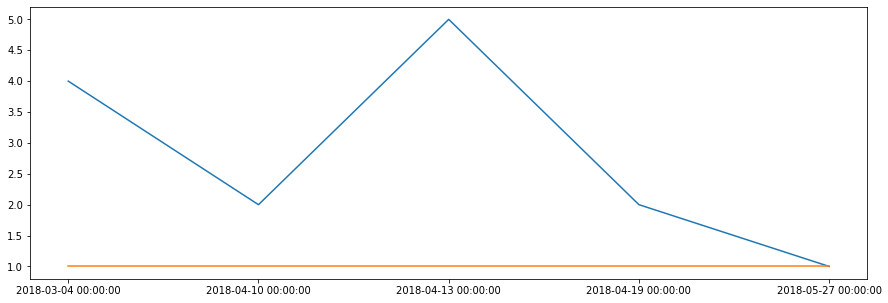

In [21]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(df[df['product_id']==4592903.0]['collection_day'],df[df['product_id']==4592903.0]['stock'])
ax.plot(df[df['product_id']==4592903.0]['collection_day'],df[df['product_id']==4592903.0]['quantity'])

<IPython.core.display.Javascript object>


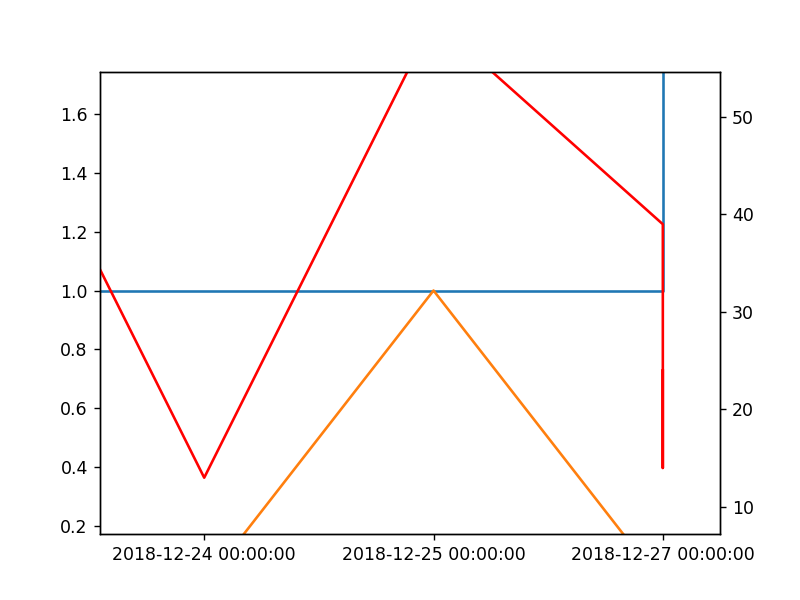

In [34]:
fig,ax = plt.subplots(1,1)
# ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['stock'])

ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['quantity'])

ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['not_found'])
# %matplotlib notebook
ax = ax.twinx()

ax.plot(df[df['product_id']==8860.0]['collection_day'],df[df['product_id']==8860.0]['stock'],color="r")
plt.show()

In [36]:
df[df['product_id']==8860.0]['collection_day'].size

258

In [39]:
df['collection_day'] = pd.to_datetime(df['collection_day'])

In [42]:
df['collection_day'].iloc[2145959].weekday()

2

In [51]:
len(df['promotion_price'])

4000000

In [50]:
df['promotion_price'].isna().sum()

2450103

# Data preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import numpy as np

In [5]:
def create_time_features(df,time_column='date', label=None):
    """
    Creates time series features from datetime index
    """
#     df['date'] = df['completed_at']
    if time_column == 'starts_at':
        df[time_column]=df[time_column]-pd.Timedelta(hours=3)
    df[time_column+'_hour'] = df[time_column].dt.hour
    df[time_column+'_dayofweek'] = df[time_column].dt.dayofweek
    df[time_column+'_quarter'] = df[time_column].dt.quarter
    df[time_column+'_month'] = df[time_column].dt.month
    df[time_column+'_year'] = df[time_column].dt.year
    df[time_column+'_dayofyear'] = df[time_column].dt.dayofyear
    df[time_column+'_dayofmonth'] = df[time_column].dt.day
    df[time_column+'_weekofyear'] = df[time_column].dt.weekofyear
    
#     X = df[['hour','dayofweek','quarter','month','year',
#            'dayofyear','dayofmonth','weekofyear']]
    df=df.drop(columns=[time_column])
    X = df
    if label:
        y = df[label]
        return X, y
    return X

brand - заполним строковым nan

product id - дропнуть строки

regular price - дропнуть строки

promotion_price - заполнить regular price

shopper_login - nan (возможно не нужно, так как не влияет на наполненность магазина)

In [8]:
df_test = pd.read_csv(r"d:\Загрузки\part1.csv")
# df = df.sort_values(by='collection_day')
# df['brand'].fillna('nan', inplace=True)
df_test= df_test.dropna(subset=['product_id','regular_price','brand'])
# df['shopper_login'].fillna('nan', inplace=True)
df_test.promotion_price.fillna(0, inplace=True)
df_test[df_test['promotion_price']>0]=1
df_test = df_test.drop(columns=['Unnamed: 0','product_name','shopper_login'])#,'collection_day'])
df_test['collection_day'] = pd.to_datetime(df_test['collection_day'])
df_test['starts_at'] = pd.to_datetime(df_test['starts_at'])
df_test['completed_at'] = pd.to_datetime(df_test['completed_at'])

df_test = create_time_features(df_test, time_column='collection_day')
df_test = create_time_features(df_test, time_column='starts_at')
df_test = create_time_features(df_test, time_column='completed_at')

In [38]:
df_test = pd.read_csv('eval_data.csv')
# df = df.sort_values(by='collection_day')
# df['brand'].fillna('nan', inplace=True)
# df_test= df_test.dropna(subset=['product_id','regular_price','brand'])
# df_test.dropna(subset=['product_id','regular_price','brand'])
df['brand'].fillna('nan', inplace=True)
df['regular_price'].fillna(0, inplace=True)
df['product_id'].fillna(-1, inplace=True)
# df['shopper_login'].fillna('nan', inplace=True)
df_test.promotion_price.fillna(0, inplace=True)
df_test[df_test['promotion_price']>0]=1
df_test = df_test.drop(columns=['Unnamed: 0','product_name','shopper_login'])#,'collection_day'])
df_test['collection_day'] = pd.to_datetime(df_test['collection_day'])
df_test['starts_at'] = pd.to_datetime(df_test['starts_at'])
df_test['completed_at'] = pd.to_datetime(df_test['completed_at'])

df_test = create_time_features(df_test, time_column='collection_day')
df_test = create_time_features(df_test, time_column='starts_at')
df_test = create_time_features(df_test, time_column='completed_at')

In [33]:
df_test = pd.read_csv('eval_data.csv')

In [9]:
df_test

,department,quantity,category,package_type,not_found,store_id,stock,brand,product_id,city,...,starts_at_dayofmonth,starts_at_weekofyear,completed_at_hour,completed_at_dayofweek,completed_at_quarter,completed_at_month,completed_at_year,completed_at_dayofyear,completed_at_dayofmonth,completed_at_weekofyear
0,GIFTS (HAMPERS),1,Подарочные корзины,ШТУКА,1,10,2.0,BARATTI,4592903.0,1,...,10,15,16,0,2,4,2018,99,9,15
1,GIFTS (HAMPERS),1,Подарочные корзины,ШТУКА,1,10,17.0,BARATTI,4592883.0,1,...,10,15,16,0,2,4,2018,99,9,15
2,GIFTS (HAMPERS),1,Подарочные корзины,ШТУКА,1,8,91.0,CURTIS,67225.0,1,...,10,15,12,1,2,4,2018,100,10,15
3,GIFTS (HAMPERS),1,Подарочные корзины,ШТУКА,1,67,5.0,BARATTI,4592903.0,3,...,13,15,20,3,2,4,2018,102,12,15
4,GIFTS (HAMPERS),2,Подарочные корзины,ШТУКА,1,12,1.0,CURTIS,67976.0,1,...,12,15,13,3,2,4,2018,102,12,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999995,1,1,1,1,1,1,1.0,1,1.0,1,...,31,1,0,3,1,1,1970,1,1,1
3999996,1,1,1,1,1,1,1.0,1,1.0,1,...,31,1,0,3,1,1,1970,1,1,1
3999997,МОЛОЧНЫЕ,1,ТВОРОГ,ШТУКА,0,10,62.0,METRO CHEF,4275056.0,1,...,19,42,21,3,4,10,2018,291,18,42
3999998,МОЛОЧНЫЕ,2,СЛИВКИ,ШТУКА,0,10,30.0,PRESIDENT,26631.0,1,...,19,42,21,3,4,10,2018,291,18,42


In [35]:
df_test.isna().sum()

Unnamed: 0               0
department           18707
product_name             0
quantity                 0
category             18707
package_type         18707
store_id                 0
stock                18707
brand                69167
collection_day           0
product_id            4648
city                     0
promotion_price     759100
regular_price        18707
completed_at             0
starts_at                0
order_identifier         0
shopper_login       195271
dtype: int64

In [41]:
df = pd.read_csv('part1.csv')
# df = df.sort_values(by='collection_day')
# df['brand'].fillna('nan', inplace=True)
df= df.dropna(subset=['product_id','regular_price','brand'])
# df['shopper_login'].fillna('nan', inplace=True)
df.promotion_price.fillna(0, inplace=True)
df[df['promotion_price']>0]=1
df = df.drop(columns=['Unnamed: 0','product_name','shopper_login'])#,'collection_day'])
df['collection_day'] = pd.to_datetime(df['collection_day'])
df['starts_at'] = pd.to_datetime(df['starts_at'])
df['completed_at'] = pd.to_datetime(df['completed_at'])

df = create_time_features(df, time_column='collection_day')
df = create_time_features(df, time_column='starts_at')
df = create_time_features(df, time_column='completed_at')

In [23]:
!pip install numpy==1.16.1 --user

     |████████████████████████████████| 17.3MB 900kB/s eta 0:00:01
  Found existing installation: numpy 1.18.1
    Uninstalling numpy-1.18.1:
      Successfully uninstalled numpy-1.18.1
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [26]:
df['product_freq']=df.groupby(by='product_id')["not_found"].mean()#/df.groupby(by='product_id')['order_identifier'].nunique()

In [27]:
df['cat_freq']=df.groupby(by='category')["not_found"].mean()#/df.groupby(by='category')['order_identifier'].nunique()

In [28]:
df['depart_freq']=df.groupby(by='department')["not_found"].mean()

In [45]:
df_test['product_freq']=df_test.groupby(by='product_id')["not_found"].mean()#/df.groupby(by='product_id')['order_identifier'].nunique()
df_test['cat_freq']=df_test.groupby(by='category')["not_found"].mean()
df_test['depart_freq']=df_test.groupby(by='department')["not_found"].mean()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3986966 entries, 0 to 3999999
Data columns (total 40 columns):
department                   object
quantity                     int64
category                     object
package_type                 object
not_found                    int64
store_id                     int64
stock                        float64
brand                        object
product_id                   float64
city                         int64
promotion_price              float64
regular_price                float64
order_identifier             int64
collection_day_hour          int64
collection_day_dayofweek     int64
collection_day_quarter       int64
collection_day_month         int64
collection_day_year          int64
collection_day_dayofyear     int64
collection_day_dayofmonth    int64
collection_day_weekofyear    int64
starts_at_hour               int64
starts_at_dayofweek          int64
starts_at_quarter            int64
starts_at_month              int64


In [12]:
# Функция для LabelEncoding столбцов со строковыми значениями
def label_encode_customer(df, columns_to_encode):
#     columns_to_encode = [f'product_{i}' for i in range(7)] + ['marital_status_cd', 'job_title']
    for col in columns_to_encode:
        df[col].fillna('nan', inplace=True)
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

In [13]:
# Функция, в которой мы заполняем NaNы в некоторых столбцах медианой
def fill_nans_customer(cust, columns_to_fill):
#     columns_to_fill = ['age', 'first_session_year', 'first_session_month',
#                        'first_session_day', 'first_session_hour']
#     for col in columns_to_fill:
#         cust[col].fillna(cust[col].median(), inplace=True)
    cust['promotion_price'].fillna(-1, inplace=True)
    cust['shopper_login'].fillna(-1, inplace=True)
    return cust

In [39]:
df.head()

,department,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,...,starts_at_dayofmonth,starts_at_weekofyear,completed_at_hour,completed_at_dayofweek,completed_at_quarter,completed_at_month,completed_at_year,completed_at_dayofyear,completed_at_dayofmonth,completed_at_weekofyear
2145959,КОСМЕТИКА,1,ОДНОРАЗОВЫЕ ПРИНАДЛЕЖНОСТИ,ШТУКА,0,21,19.0,RIOBA,2017-01-09,8860.0,...,9,2,13,0,1,1,2017,9,9,2
541818,ДЕЛИКАТЕСЫ И СЫР,0,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,1,3,5.0,ДАНЕССИЯ,2017-01-09,84082.0,...,9,2,17,0,1,1,2017,9,9,2
541815,ДЕЛИКАТЕСЫ И СЫР,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,3,7.0,ДАНЕССИЯ,2017-01-09,84081.0,...,9,2,17,0,1,1,2017,9,9,2
541808,ДЕЛИКАТЕСЫ И СЫР,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,1,12,31.0,FRESH SECRET,2017-01-09,6847.0,...,9,2,12,0,1,1,2017,9,9,2
541807,ДЕЛИКАТЕСЫ И СЫР,1,ОХЛАЖДЕННЫЕ ГОТОВЫЕ БЛЮДА,ШТУКА,0,12,5.0,FRESH SECRET,2017-01-09,20085.0,...,9,2,12,0,1,1,2017,9,9,2


In [40]:
df.columns

Index(['department', 'quantity', 'category', 'package_type', 'not_found',
       'store_id', 'stock', 'brand', 'collection_day', 'product_id', 'city',
       'promotion_price', 'regular_price', 'completed_at', 'starts_at',
       'order_identifier', 'shopper_login', 'collection_day_hour',
       'collection_day_dayofweek', 'collection_day_quarter',
       'collection_day_month', 'collection_day_year',
       'collection_day_dayofyear', 'collection_day_dayofmonth',
       'collection_day_weekofyear', 'starts_at_hour', 'starts_at_dayofweek',
       'starts_at_quarter', 'starts_at_month', 'starts_at_year',
       'starts_at_dayofyear', 'starts_at_dayofmonth', 'starts_at_weekofyear',
       'completed_at_hour', 'completed_at_dayofweek', 'completed_at_quarter',
       'completed_at_month', 'completed_at_year', 'completed_at_dayofyear',
       'completed_at_dayofmonth', 'completed_at_weekofyear'],
      dtype='object')

In [6]:
categories = ['department','category','package_type','brand']

In [13]:
counts = ['quantity','stock','regular_price','promotion_price']

In [15]:
ids = ['store_id','product_id','shopper_login']

In [ ]:
nans=['brand','product_id', 'promotion_price', 'shopper_login']

In [65]:
df.groupby('order_identifier')['regular_price'].transform('sum').mean()

2076.737914253001

In [63]:
def f(x):
    y=x['quantity']*x['regular_price']
    return pd.DataFrame({'order_id':x['order_identifier'],'price':y})

In [66]:
# df = pd.read_csv('part1.csv')
df.groupby('order_identifier').transform(lambda x: x['quantity']*x['regular_price'])

KeyError: ('quantity', 'occurred at index Unnamed: 0')

In [17]:
df = pd.read_csv('part1.csv')
df.head()

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
0,0,GIFTS (HAMPERS),75Г ШОК.ТЕМ.ЭКВАДОР75% BARATTI,1,Подарочные корзины,ШТУКА,1,10,2.0,BARATTI,2018-04-10 00:00:00,4592903.0,1,NaN,78.650,2018-04-09 16:31:00,2018-04-10 21:00:00,925225,len_kd94
1,1,GIFTS (HAMPERS),75Г ШОК.ГОР.АПЕЛ\МИНД.BARATTI,1,Подарочные корзины,ШТУКА,1,10,17.0,BARATTI,2018-04-10 00:00:00,4592883.0,1,NaN,77.390,2018-04-09 16:31:00,2018-04-10 21:00:00,925225,len_kd94
2,2,GIFTS (HAMPERS),"20X1,8Г ЧАЙ ЗЕЛ МОХИТО CURTIS",1,Подарочные корзины,ШТУКА,1,8,91.0,CURTIS,2018-04-10 00:00:00,67225.0,1,NaN,49.643,2018-04-10 12:21:00,2018-04-10 16:00:00,883302,shel_pn96
3,3,GIFTS (HAMPERS),75Г ШОК.ТЕМ.ЭКВАДОР75% BARATTI,1,Подарочные корзины,ШТУКА,1,67,5.0,BARATTI,2018-04-13 00:00:00,4592903.0,3,NaN,78.650,2018-04-12 20:22:00,2018-04-13 12:00:00,932567,sib_ss95
4,4,GIFTS (HAMPERS),"20X1,8Г ЧАЙ ЧЕР.ФРАН.ТРЮФ.CURT",2,Подарочные корзины,ШТУКА,1,12,1.0,CURTIS,2018-04-12 00:00:00,67976.0,1,NaN,49.643,2018-04-12 13:28:00,2018-04-12 18:00:00,932006,dubr_pu83


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 19 columns):
Unnamed: 0          int64
department          object
product_name        object
quantity            int64
category            object
package_type        object
not_found           int64
store_id            int64
stock               float64
brand               object
collection_day      object
product_id          float64
city                int64
promotion_price     float64
regular_price       float64
completed_at        object
starts_at           object
order_identifier    int64
shopper_login       object
dtypes: float64(4), int64(6), object(9)
memory usage: 579.8+ MB


### Категориальный split

In [10]:
# Функция preprocess_customer выполняет препроцессинг датасета customer. Сейчас можно выбрать
# один или несколько способов закодировать категориальные переменные - One Hot Encoding,
# Frequency encoding и mean encoding. Соответственно, в encodings надо передавать занчения 'mean',
# 'one-hot' или 'frequency'. Label Encoding будет по умолчанию.
def preprocess_customer(customer, categories, encodings=[], drop_original=False, most_often_departments=15, most_often_categories=15):
    cust = customer.copy()

#     # Обработка пола, Male - 1, Female - 0. NaNы заполняем как Male, потому что мужчин больше.
#     cust['gender_cd'].fillna('M', inplace=True)
#     cust['gender_cd'] = (cust['gender_cd'] == 'M').astype(int)

    # job_title переводим в нижний регистр
    for category in categories:
        cust[category] = cust[category].str.lower()

#     # Обработка даты первой сессии
#     cust['first_session_dttm_nan'] = (cust['first_session_dttm'].isna()).astype(int)
#     cust['first_session_dttm'] = cust['first_session_dttm'].apply(pd.to_datetime)
#     cust['first_session_year'] = pd.DatetimeIndex(cust['first_session_dttm']).year
#     cust['first_session_month'] = pd.DatetimeIndex(cust['first_session_dttm']).month
#     cust['first_session_day'] = pd.DatetimeIndex(cust['first_session_dttm']).day
#     cust['first_session_hour'] = pd.DatetimeIndex(cust['first_session_dttm']).hour
#     cust.drop('first_session_dttm', axis=1, inplace=True)

    # Обработка возраста
#     cust['age_less_than_17'] = (cust['age'] < 17).astype(int)
#     cust['age_17_25'] = ((cust['age'] >= 17) & (cust['age'] <= 25)).astype(int)
#     cust['age_26_40'] = ((cust['age'] >= 26) & (cust['age'] <= 40)).astype(int)
#     cust['age_more_than_40'] = (cust['age'] > 40).astype(int)
#     cust['age_nan'] = (cust['age'].isna()).astype(int)

    # Кодируем и заполняем пропуски
    cust = label_encode_customer(cust, categories)
#     cust = fill_nans_customer(cust)

    for encoding in encodings:
        if encoding == 'one-hot':
            common_jobs = cust['department'].value_counts().index[:most_often_departments]
            cust['department'] = cust['department'].apply(lambda x:
                                                        x if x in common_jobs else -1)
            common_jobs = cust['category'].value_counts().index[:most_often_categories]
            cust['category'] = cust['category'].apply(lambda x:
                                                        x if x in common_jobs else -1)


            columns_to_encode = categories
            for col in columns_to_encode:
                one_hot = pd.get_dummies(cust[col])
                one_hot.columns = [f'{col}_one_hot_{str(val)}' for val in one_hot.columns]
                cust = pd.concat([cust, one_hot], axis=1)

#         if encoding == 'frequency':
#             columns_to_encode = [f'product_{i}' for i in range(7)] + ['marital_status_cd', 'job_title',
#                                                                       'first_session_year', 'first_session_month',
#                                                                       'first_session_day', 'first_session_hour', 'age',
#                                                                       'children_cnt', 'job_position_cd']
#             for col in columns_to_encode:
#                 vc = cust[col].value_counts()
#                 cust = cust.join(vc, on=col, rsuffix='_frequency_encoded')
#         if encoding == 'mean':
#             columns_to_encode = [f'product_{i}' for i in range(7)] + ['marital_status_cd', 'job_title',
#                                                                       'first_session_year', 'first_session_month',
#                                                                       'first_session_day', 'first_session_hour', 'age',
#                                                                       'children_cnt', 'job_position_cd']

#             event_encoded = pd.get_dummies(react['event'])
#             for col in columns_to_encode:
#                 joint = pd.concat([react[['customer_id']], event_encoded], axis=1)
#                 joint = joint.join(cust[[col, 'customer_id']].set_index('customer_id'),
#                                    on='customer_id')
#                 joint.drop('customer_id', axis=1, inplace=True)
#                 joint.columns = [name + '_to_mean_' + col for name in joint.columns]
#                 cust = cust.join(joint.groupby(col + '_to_mean_' + col).mean())
#             cust.fillna(0., inplace=True)
    if drop_original:
        cols_to_drop = [f'product_{i}' for i in range(7)] + ['marital_status_cd', 'job_title']
        cust.drop(cols_to_drop, axis=1, inplace=True)

    return cust


In [14]:
categories = ['department','category','package_type','brand']
df = preprocess_customer(df, categories, encodings=[], drop_original=False, most_often_departments=15, most_often_categories=15)

In [15]:
df_test = preprocess_customer(df_test, categories, encodings=[], drop_original=False, most_often_departments=15, most_often_categories=15)

In [16]:
from sklearn.model_selection import train_test_split
y=df['not_found']
X = df.drop(columns=['not_found'])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [17]:
df.head()

,Unnamed: 0,department,product_name,quantity,category,package_type,not_found,store_id,stock,brand,collection_day,product_id,city,promotion_price,regular_price,completed_at,starts_at,order_identifier,shopper_login
1139450,1139450,8,ХЛОПЬЯ ГРЕЧНЕВЫЕ FINE LIFE 500,1,185,16,1,2,116.0,482,2017-01-09,26182.0,1,NaN,81.107,2017-01-09 17:47:00,2017-01-09 21:00:00,339061,NaN
775706,775706,8,250Г СОЛЬ МОРС ЙОД МЕЛК SETRA,1,176,16,0,12,74.0,1244,2017-01-09,26225.0,1,NaN,83.888,2017-01-09 11:47:00,2017-01-09 15:00:00,338658,NaN
1974658,1974658,12,20 ШТ ЯЙЦО КУР Б/КЛЕТОК С0 FFF,1,215,14,0,11,513.0,481,2017-01-09,588.0,1,NaN,134.864,2017-01-09 12:17:00,2017-01-09 20:00:00,338679,NaN
1974660,1974660,12,ГРУДКА ЦБ ОХЛ ПОДЛОЖКА ХАЛЯЛЬ,1,161,7,0,10,1.5,1593,2017-01-09,31408.0,1,NaN,165.959,2017-01-09 11:52:00,2017-01-09 19:00:00,338599,NaN
775709,775709,8,КАША ОВСЯНАЯ ЧЕРНИКА MATTI 240,1,185,16,1,12,28.0,888,2017-01-09,15437.0,1,NaN,77.498,2017-01-09 11:47:00,2017-01-09 15:00:00,338658,NaN


### Catboost

In [20]:
from catboost import CatBoostClassifier

# train_data = [[0, 3],
#               [4, 1],
#               [8, 1],
#               [9, 1]]
# train_labels = [0, 0, 1, 1]

model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0')
model.fit(X_train, y_train, verbose=True)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=2]="ХЛОПЬЯ ОВСЯНЫЕ ЭКСТРА 3 ЯСНО С": Cannot convert 'b'\xd0\xa5\xd0\x9b\xd0\x9e\xd0\x9f\xd0\xac\xd0\xaf \xd0\x9e\xd0\x92\xd0\xa1\xd0\xaf\xd0\x9d\xd0\xab\xd0\x95 \xd0\xad\xd0\x9a\xd0\xa1\xd0\xa2\xd0\xa0\xd0\x90 3 \xd0\xaf\xd0\xa1\xd0\x9d\xd0\x9e \xd0\xa1'' to float

In [46]:
roc_auc_score(y_test, model.predict(X_test))

0.9368640719602978

In [19]:
!pip install catboost

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [21]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797394 entries, 3384603 to 1072087
Data columns (total 36 columns):
department                   797394 non-null int64
quantity                     797394 non-null int64
category                     797394 non-null int64
package_type                 797394 non-null int64
store_id                     797394 non-null int64
stock                        797394 non-null float64
brand                        797394 non-null int64
product_id                   797394 non-null float64
city                         797394 non-null int64
promotion_price              797394 non-null float64
regular_price                797394 non-null float64
order_identifier             797394 non-null int64
collection_day_hour          797394 non-null int64
collection_day_dayofweek     797394 non-null int64
collection_day_quarter       797394 non-null int64
collection_day_month         797394 non-null int64
collection_day_year          797394 non-null int64
collect

In [35]:
from catboost import CatBoostClassifier

# train_data = [[0, 3],
#               [4, 1],
#               [8, 1],
#               [9, 1]]
# train_labels = [0, 0, 1, 1]

model = CatBoostClassifier(iterations=1000, 
                           task_type="GPU",
                           devices='0')
model.fit(X_train,
          y_train,
          verbose=True)

Learning rate set to 0.164316
0:	learn: 0.3932900	total: 69.3ms	remaining: 1m 9s
1:	learn: 0.2904461	total: 131ms	remaining: 1m 5s
2:	learn: 0.2467408	total: 197ms	remaining: 1m 5s
3:	learn: 0.2228960	total: 262ms	remaining: 1m 5s
4:	learn: 0.2086753	total: 318ms	remaining: 1m 3s
5:	learn: 0.1980596	total: 379ms	remaining: 1m 2s
6:	learn: 0.1916257	total: 435ms	remaining: 1m 1s
7:	learn: 0.1870715	total: 488ms	remaining: 1m
8:	learn: 0.1841227	total: 547ms	remaining: 1m
9:	learn: 0.1818049	total: 597ms	remaining: 59.1s
10:	learn: 0.1801631	total: 656ms	remaining: 59s
11:	learn: 0.1788415	total: 711ms	remaining: 58.6s
12:	learn: 0.1780508	total: 764ms	remaining: 58s
13:	learn: 0.1773122	total: 817ms	remaining: 57.5s
14:	learn: 0.1769052	total: 874ms	remaining: 57.4s
15:	learn: 0.1765114	total: 924ms	remaining: 56.8s
16:	learn: 0.1761830	total: 977ms	remaining: 56.5s
17:	learn: 0.1758676	total: 1.03s	remaining: 56.2s
18:	learn: 0.1756461	total: 1.08s	remaining: 56s
19:	learn: 0.1754306	t

161:	learn: 0.1696927	total: 8.34s	remaining: 43.1s
162:	learn: 0.1696777	total: 8.39s	remaining: 43.1s
163:	learn: 0.1696471	total: 8.44s	remaining: 43s
164:	learn: 0.1696171	total: 8.49s	remaining: 43s
165:	learn: 0.1695992	total: 8.54s	remaining: 42.9s
166:	learn: 0.1695636	total: 8.59s	remaining: 42.8s
167:	learn: 0.1695550	total: 8.64s	remaining: 42.8s
168:	learn: 0.1695407	total: 8.69s	remaining: 42.7s
169:	learn: 0.1695149	total: 8.74s	remaining: 42.7s
170:	learn: 0.1694917	total: 8.79s	remaining: 42.6s
171:	learn: 0.1694768	total: 8.84s	remaining: 42.6s
172:	learn: 0.1694511	total: 8.89s	remaining: 42.5s
173:	learn: 0.1694390	total: 8.94s	remaining: 42.5s
174:	learn: 0.1694234	total: 8.99s	remaining: 42.4s
175:	learn: 0.1694140	total: 9.04s	remaining: 42.3s
176:	learn: 0.1694055	total: 9.1s	remaining: 42.3s
177:	learn: 0.1693890	total: 9.15s	remaining: 42.2s
178:	learn: 0.1693679	total: 9.2s	remaining: 42.2s
179:	learn: 0.1693484	total: 9.25s	remaining: 42.2s
180:	learn: 0.1693

322:	learn: 0.1673865	total: 16.5s	remaining: 34.6s
323:	learn: 0.1673695	total: 16.6s	remaining: 34.6s
324:	learn: 0.1673669	total: 16.6s	remaining: 34.5s
325:	learn: 0.1673592	total: 16.7s	remaining: 34.5s
326:	learn: 0.1673487	total: 16.7s	remaining: 34.4s
327:	learn: 0.1673323	total: 16.8s	remaining: 34.4s
328:	learn: 0.1673215	total: 16.8s	remaining: 34.3s
329:	learn: 0.1673139	total: 16.9s	remaining: 34.3s
330:	learn: 0.1673013	total: 16.9s	remaining: 34.2s
331:	learn: 0.1672928	total: 17s	remaining: 34.2s
332:	learn: 0.1672818	total: 17s	remaining: 34.1s
333:	learn: 0.1672747	total: 17.1s	remaining: 34.1s
334:	learn: 0.1672626	total: 17.1s	remaining: 34s
335:	learn: 0.1672412	total: 17.2s	remaining: 34s
336:	learn: 0.1672361	total: 17.2s	remaining: 33.9s
337:	learn: 0.1672216	total: 17.3s	remaining: 33.9s
338:	learn: 0.1672157	total: 17.3s	remaining: 33.8s
339:	learn: 0.1672043	total: 17.4s	remaining: 33.8s
340:	learn: 0.1671913	total: 17.4s	remaining: 33.7s
341:	learn: 0.167186

484:	learn: 0.1660292	total: 24.8s	remaining: 26.3s
485:	learn: 0.1660220	total: 24.8s	remaining: 26.3s
486:	learn: 0.1660113	total: 24.9s	remaining: 26.2s
487:	learn: 0.1659925	total: 24.9s	remaining: 26.2s
488:	learn: 0.1659740	total: 25s	remaining: 26.1s
489:	learn: 0.1659633	total: 25s	remaining: 26.1s
490:	learn: 0.1659588	total: 25.1s	remaining: 26s
491:	learn: 0.1659539	total: 25.1s	remaining: 25.9s
492:	learn: 0.1659442	total: 25.2s	remaining: 25.9s
493:	learn: 0.1659336	total: 25.2s	remaining: 25.8s
494:	learn: 0.1659313	total: 25.3s	remaining: 25.8s
495:	learn: 0.1659257	total: 25.3s	remaining: 25.7s
496:	learn: 0.1659170	total: 25.4s	remaining: 25.7s
497:	learn: 0.1659107	total: 25.4s	remaining: 25.6s
498:	learn: 0.1659029	total: 25.5s	remaining: 25.6s
499:	learn: 0.1658924	total: 25.5s	remaining: 25.5s
500:	learn: 0.1658858	total: 25.6s	remaining: 25.5s
501:	learn: 0.1658818	total: 25.6s	remaining: 25.4s
502:	learn: 0.1658716	total: 25.7s	remaining: 25.4s
503:	learn: 0.1658

646:	learn: 0.1648966	total: 33s	remaining: 18s
647:	learn: 0.1648864	total: 33.1s	remaining: 18s
648:	learn: 0.1648814	total: 33.1s	remaining: 17.9s
649:	learn: 0.1648777	total: 33.2s	remaining: 17.9s
650:	learn: 0.1648718	total: 33.2s	remaining: 17.8s
651:	learn: 0.1648679	total: 33.3s	remaining: 17.8s
652:	learn: 0.1648645	total: 33.3s	remaining: 17.7s
653:	learn: 0.1648609	total: 33.4s	remaining: 17.7s
654:	learn: 0.1648544	total: 33.4s	remaining: 17.6s
655:	learn: 0.1648501	total: 33.5s	remaining: 17.6s
656:	learn: 0.1648462	total: 33.5s	remaining: 17.5s
657:	learn: 0.1648433	total: 33.6s	remaining: 17.5s
658:	learn: 0.1648399	total: 33.6s	remaining: 17.4s
659:	learn: 0.1648329	total: 33.7s	remaining: 17.4s
660:	learn: 0.1648259	total: 33.7s	remaining: 17.3s
661:	learn: 0.1648212	total: 33.8s	remaining: 17.3s
662:	learn: 0.1648115	total: 33.8s	remaining: 17.2s
663:	learn: 0.1648041	total: 33.9s	remaining: 17.1s
664:	learn: 0.1647943	total: 33.9s	remaining: 17.1s
665:	learn: 0.1647

807:	learn: 0.1639720	total: 41.2s	remaining: 9.78s
808:	learn: 0.1639636	total: 41.2s	remaining: 9.73s
809:	learn: 0.1639575	total: 41.3s	remaining: 9.68s
810:	learn: 0.1639550	total: 41.3s	remaining: 9.63s
811:	learn: 0.1639498	total: 41.4s	remaining: 9.58s
812:	learn: 0.1639463	total: 41.4s	remaining: 9.53s
813:	learn: 0.1639389	total: 41.5s	remaining: 9.48s
814:	learn: 0.1639300	total: 41.5s	remaining: 9.43s
815:	learn: 0.1639262	total: 41.6s	remaining: 9.37s
816:	learn: 0.1639189	total: 41.6s	remaining: 9.32s
817:	learn: 0.1639121	total: 41.7s	remaining: 9.27s
818:	learn: 0.1639058	total: 41.7s	remaining: 9.22s
819:	learn: 0.1638996	total: 41.8s	remaining: 9.17s
820:	learn: 0.1638931	total: 41.8s	remaining: 9.12s
821:	learn: 0.1638891	total: 41.9s	remaining: 9.07s
822:	learn: 0.1638839	total: 41.9s	remaining: 9.02s
823:	learn: 0.1638749	total: 42s	remaining: 8.97s
824:	learn: 0.1638706	total: 42s	remaining: 8.91s
825:	learn: 0.1638660	total: 42.1s	remaining: 8.86s
826:	learn: 0.16

969:	learn: 0.1631685	total: 49.3s	remaining: 1.53s
970:	learn: 0.1631632	total: 49.4s	remaining: 1.48s
971:	learn: 0.1631548	total: 49.4s	remaining: 1.42s
972:	learn: 0.1631512	total: 49.5s	remaining: 1.37s
973:	learn: 0.1631466	total: 49.6s	remaining: 1.32s
974:	learn: 0.1631384	total: 49.6s	remaining: 1.27s
975:	learn: 0.1631340	total: 49.7s	remaining: 1.22s
976:	learn: 0.1631310	total: 49.7s	remaining: 1.17s
977:	learn: 0.1631267	total: 49.7s	remaining: 1.12s
978:	learn: 0.1631240	total: 49.8s	remaining: 1.07s
979:	learn: 0.1631197	total: 49.8s	remaining: 1.02s
980:	learn: 0.1631165	total: 49.9s	remaining: 966ms
981:	learn: 0.1631128	total: 50s	remaining: 916ms
982:	learn: 0.1631052	total: 50s	remaining: 865ms
983:	learn: 0.1631008	total: 50.1s	remaining: 814ms
984:	learn: 0.1630978	total: 50.1s	remaining: 763ms
985:	learn: 0.1630953	total: 50.1s	remaining: 712ms
986:	learn: 0.1630915	total: 50.2s	remaining: 661ms
987:	learn: 0.1630871	total: 50.3s	remaining: 610ms
988:	learn: 0.16

In [41]:
roc_auc_score(y_test, model.predict(X_test))

0.9375059319079141

In [49]:
roc_auc_score(df_test.not_found, model.predict(df_test))

0.9098459819876968

In [51]:
model.predict_proba(df_test)[:,1]

array([0.99999994, 0.18652976, 0.10743902, ..., 0.01608098, 0.99999994,
       0.99999994])

In [26]:
model.predict_proba(df_test)[:,1]

array([0.01459337, 0.32747132, 0.15832895, ..., 0.20861606, 0.99999974,
       0.99999974])

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167490 entries, 0 to 1239871
Data columns (total 38 columns):
department                   1167490 non-null int64
quantity                     1167490 non-null int64
category                     1167490 non-null int64
package_type                 1167490 non-null int64
store_id                     1167490 non-null int64
stock                        1167490 non-null float64
brand                        1167490 non-null int64
product_id                   1167490 non-null float64
city                         1167490 non-null int64
promotion_price              1167490 non-null float64
regular_price                1167490 non-null float64
order_identifier             1167490 non-null int64
collection_day_hour          1167490 non-null int64
collection_day_dayofweek     1167490 non-null int64
collection_day_quarter       1167490 non-null int64
collection_day_month         1167490 non-null int64
collection_day_year          1167490 non-null i

In [40]:

df_proba = df_test

df_proba['id'] = df_test.index
df_proba['forecast'] = model.predict_proba(df_test)[:,1]

df_proba[["id","forecast"]].to_csv("statistic.csv", index=False)

In [42]:
X_train.shape

(3189572, 39)

In [39]:
model.predict(X_test)

array([1., 0., 0., ..., 0., 0., 0.])

In [48]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814351 entries, 0 to 852468
Data columns (total 40 columns):
department                   814351 non-null int64
quantity                     814351 non-null int64
category                     814351 non-null int64
package_type                 814351 non-null int64
not_found                    814351 non-null int64
store_id                     814351 non-null int64
stock                        814351 non-null float64
brand                        814351 non-null int64
product_id                   814351 non-null float64
city                         814351 non-null int64
promotion_price              814351 non-null float64
regular_price                814351 non-null float64
order_identifier             814351 non-null int64
collection_day_hour          814351 non-null int64
collection_day_dayofweek     814351 non-null int64
collection_day_quarter       814351 non-null int64
collection_day_month         814351 non-null int64
collection_day

In [19]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [97]:
xgb = XGBClassifier(max_depth=7, n_estimators=200, gamma=1 )

In [98]:
xgb.fit(X_train, y_train, eval_metric=roc_auc_score, verbose=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/trinity/shared/opt/python-3.7.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-98-fd9546e82526>", line 1, in <module>
    xgb.fit(X_train, y_train, eval_metric=roc_auc_score, verbose=True)
  File "/trinity/home/a.alenicheva/.local/lib/python3.7/site-packages/xgboost/sklearn.py", line 732, in fit
    callbacks=callbacks)
  File "/trinity/home/a.alenicheva/.local/lib/python3.7/site-packages/xgboost/training.py", line 216, in train
    xgb_model=xgb_model, callbacks=callbacks)
  File "/trinity/home/a.alenicheva/.local/lib/python3.7/site-packages/xgboost/training.py", line 74, in _train_internal
    bst.update(dtrain, i, obj)
  File "/trinity/home/a.alenicheva/.local/lib/python3.7/site-packages/xgboost/core.py", line 1109, in update
    dtrain.handle))
KeyboardInterrupt

During handling of the above exception, another exception occu

KeyboardInterrupt: 

In [ ]:
import pickle
pickle.dump(xgb, open("baseline.pickle.dat", "wb"))

In [76]:
y_test.describe()

count    3.668068e+06
mean     9.994853e-02
std      2.999314e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: not_found, dtype: float64

In [94]:
roc_auc_score(y_test[:10000],xgb.predict(X_test[:10000]))

0.5233622127127453

In [106]:
# make imports
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier

In [107]:
def report_mse(model, X, y):
    """
    Reports MSE of the model on given data
    ---
    
    Parameters
    ---
    
    model - trained sklearn model
    
    X - array,
     (n_observations, n_features) matrix,
     used to predict target
    
    y - array,
     (n_observation, ) array of true target
     
    Returns
    ---
    
    mse - mean squared error
     between true target and predicted target
    """
    
    y_pred = model.predict(X)
    mse = roc_auc_score(y, y_pred)
    
    return mse

In [108]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scale=False):
    """
    Trains model on train and reports its perfomance
    on train and test data.
    ---
    
    Parameters
    ---
    
    model - sklearn regression model (not trained)
    
    X_train  - array,
     (n_observations_train, n_features) matrix,
     train data.
     
    y_train - array,
     (n_observation_train, ) array of train target
     
    X_test  - array,
     (n_observations_test, n_features) matrix,
     train data.
     
    y_test - array,
     (n_observation_test, ) array of test target
     
    scale - bool,
     whether to scale the data before training,
     default False
     
    
    Returns
    ---
    
    mse_train - float,
     mean squared error of the train prediction
     
    mse_test - float,
     mean squared error of the test prediction
    """
    
    if scale:
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
    model.fit(X_train, y_train)
    mse_train = report_mse(model, X_train, y_train)
    mse_test = report_mse(model, X_test, y_test)
    
    return mse_train, mse_test

In [145]:
model_ridge = RidgeClassifier(alpha=1e-3)
acc_ridge_train_scaled, acc_ridge_test_scaled = evaluate_model(model_ridge, X_train, y_train, X_test, y_test, scale=True)
print('Ridge acc on train scaled data: ', acc_ridge_train_scaled)
print('Ridge acc on test scaled data: ', acc_ridge_test_scaled)

Ridge acc on train scaled data:  0.4999984324195152
Ridge acc on test scaled data:  0.5


Text(0, 0.5, "Feature's names")

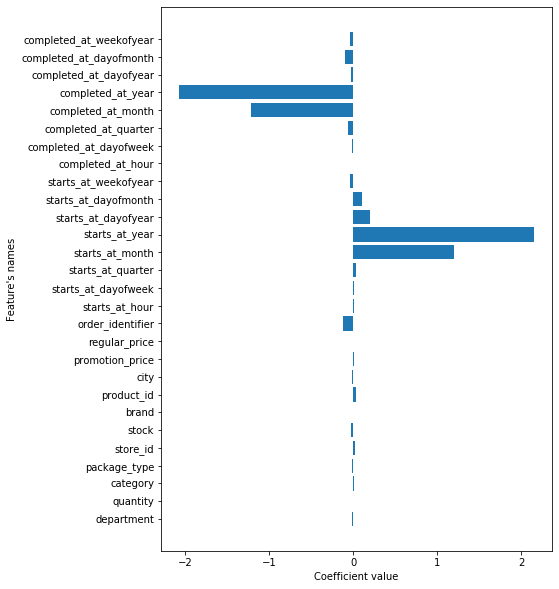

In [144]:
plt.figure(figsize=(7,10))
plt.barh(X.columns, model_ridge.coef_[0])
plt.xlabel('Coefficient value')
plt.ylabel("Feature's names")

In [117]:
model_ridge.coef_

array([[-0.0088004 , -0.00718404,  0.00689397, -0.0087006 ,  0.01699215,
        -0.02269389,  0.00114047,  0.03345546, -0.01152027, -0.02941499,
         0.02957938, -0.11377426,  0.        ,  0.00323296, -0.00315515,
         0.00834124,  0.03275467,  0.00790073,  0.0004549 , -0.0025721 ,
         0.00351141,  0.00323296, -0.00315515,  0.00834124,  0.03275467,
         0.00790073,  0.0004549 , -0.0025721 ,  0.00195287, -0.01049005,
        -0.02192427,  0.01807503,  0.00767089,  0.01852393,  0.00028127,
         0.01873009]])

In [116]:
X.columns

Index(['department', 'quantity', 'category', 'package_type', 'store_id',
       'stock', 'brand', 'product_id', 'city', 'promotion_price',
       'regular_price', 'order_identifier', 'collection_day_hour',
       'collection_day_dayofweek', 'collection_day_quarter',
       'collection_day_month', 'collection_day_year',
       'collection_day_dayofyear', 'collection_day_dayofmonth',
       'collection_day_weekofyear', 'starts_at_hour', 'starts_at_dayofweek',
       'starts_at_quarter', 'starts_at_month', 'starts_at_year',
       'starts_at_dayofyear', 'starts_at_dayofmonth', 'starts_at_weekofyear',
       'completed_at_hour', 'completed_at_dayofweek', 'completed_at_quarter',
       'completed_at_month', 'completed_at_year', 'completed_at_dayofyear',
       'completed_at_dayofmonth', 'completed_at_weekofyear'],
      dtype='object')

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

### BEGIN Solution
scaler = MinMaxScaler()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

feature_scores = scaler.fit_transform(random_forest.feature_importances_.reshape(-1, 1))
### END Solution

Text(0, 0.5, "Feature's names")

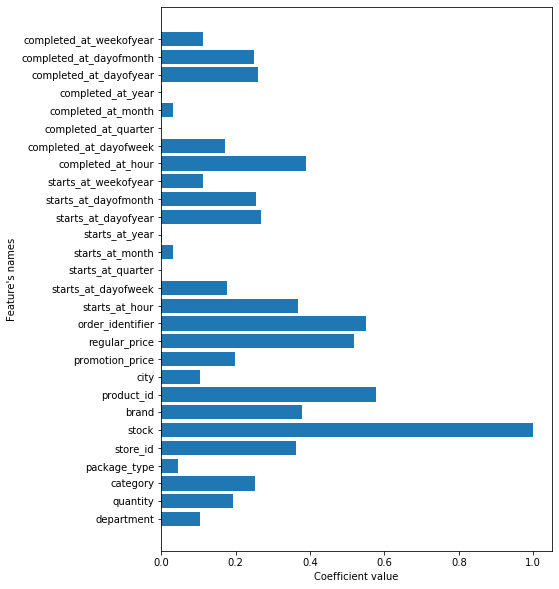

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,10))
plt.barh(X.columns, feature_scores[:,0])
plt.xlabel('Coefficient value')
plt.ylabel("Feature's names")

In [17]:
feature_scores

array([[1.04749034e-01],
       [1.92641965e-01],
       [2.51324267e-01],
       [4.46555811e-02],
       [3.63676995e-01],
       [1.00000000e+00],
       [3.78519464e-01],
       [5.77735229e-01],
       [1.03878462e-01],
       [1.98171224e-01],
       [5.18768752e-01],
       [5.50455707e-01],
       [3.66684070e-01],
       [1.76827404e-01],
       [1.34987924e-04],
       [3.22014115e-02],
       [1.47559057e-03],
       [2.69121426e-01],
       [2.54465319e-01],
       [1.11793425e-01],
       [3.89392378e-01],
       [1.71786281e-01],
       [0.00000000e+00],
       [3.19730747e-02],
       [1.10782750e-03],
       [2.59823090e-01],
       [2.48936770e-01],
       [1.11696683e-01]])

In [22]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, random_forest.predict(X_test))

0.5724843839439194

In [23]:
df.columns

Index(['department', 'quantity', 'category', 'package_type', 'not_found',
       'store_id', 'stock', 'brand', 'product_id', 'city', 'promotion_price',
       'regular_price', 'order_identifier', 'starts_at_hour',
       'starts_at_dayofweek', 'starts_at_quarter', 'starts_at_month',
       'starts_at_year', 'starts_at_dayofyear', 'starts_at_dayofmonth',
       'starts_at_weekofyear', 'completed_at_hour', 'completed_at_dayofweek',
       'completed_at_quarter', 'completed_at_month', 'completed_at_year',
       'completed_at_dayofyear', 'completed_at_dayofmonth',
       'completed_at_weekofyear'],
      dtype='object')

In [24]:
(y==0).sum()

3588427

In [25]:
(y==1).sum()

398603